#Exploratory Data Analysis and Machine Learning on NYC Restaurants Data.



  




**Team Members**

*   Shubham Harishchandra Madhavi
*   Yuga Kapil Krishna Maytharametla



**Dataset Link**

https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset



**Git Hub Link**

https://github.com/kapilkrishnam/PythonProgramming



**Abstract**

This Project analyzes and performs machine learning technique’s the "NYC Restaurants data for food ordering and delivery" dataset available on Kaggle. The data was collected by an online food delivery app and includes information about restaurants, customers, and orders. This report explores the data's content, preprocessing steps, potential use cases, and methodological approaches for analysis.

**Introduction**

 Food ordering and delivery apps have revolutionized the restaurant industry, enabling convenient access to diverse culinary options. Analyzing data from these apps can provide valuable insights into food trends, customer preferences, and restaurant performance. This report examines the "NYC Restaurants data for food ordering and delivery" dataset, offering a foundation for further exploration and analysis.

Dataset
The dataset includes data from an online food delivery app operating in New York City. It encompasses information about:
* Restaurants: Restaurant names, cuisines, locations, ratings, and delivery times.
* Customers: Customer demographics, order histories, and preferences.
* Orders: Order details, including items, prices, timestamps, and delivery information.

The data's size, granularity, and diverse scope make it valuable for various food-related analyses.


**Importing Libraries:**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Import statsmodels submodules directly
ttest_ind = stats.ttest_ind
f_oneway = stats.f_oneway
chi2_contingency = stats.chi2_contingency

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/food_order.csv'


**Loading Dataset**

In [ ]:
# Uploading the CSV file
df = pd.read_csv(file_path)


**Data Exploration and Cleaning:**

In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  


**Feature Engineering:**

In [ ]:
# Convert 'day_of_the_week' to numeric (0 for Weekday, 1 for Weekend)
df['day_of_the_week'] = df['day_of_the_week'].apply(lambda x: 0 if x == 'Weekday' else 1)

# Handle 'rating' column
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(df['rating'].median(), inplace=True)

# Create a new feature: Total Order Time
df['Total_Order_Time'] = df['food_preparation_time'] + df['delivery_time']


**Data Visualization:**

**Boxplot for Cost of the Order by Day of the Week:**

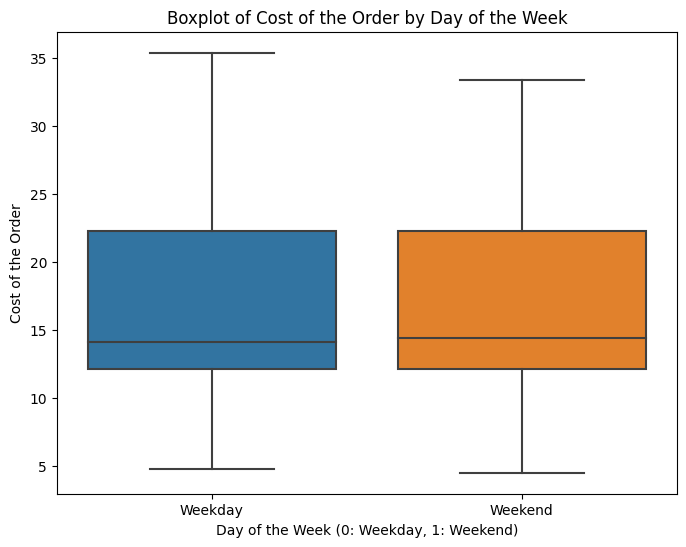

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Boxplot of Cost of the Order by Day of the Week')
plt.xlabel('Day of the Week (0: Weekday, 1: Weekend)')
plt.ylabel('Cost of the Order')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


**Heatmap of the Correlation Matrix:**

<ipython-input-10-e5fc0bc572a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


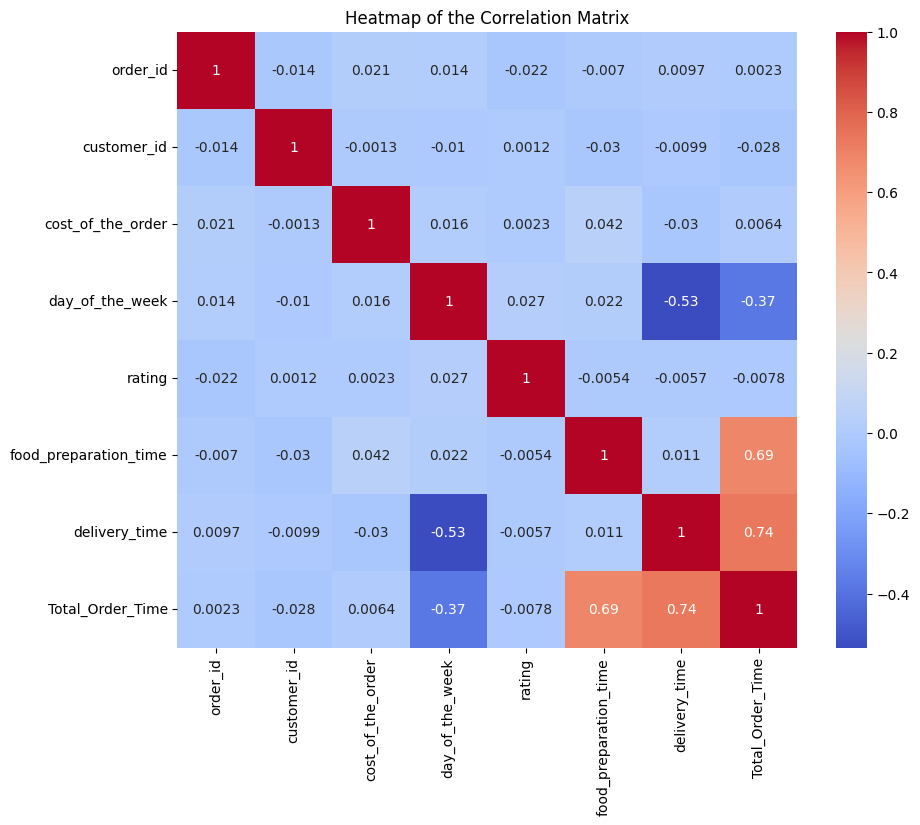

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the Correlation Matrix')
plt.show()


**Count Plot of Cuisine Types:**

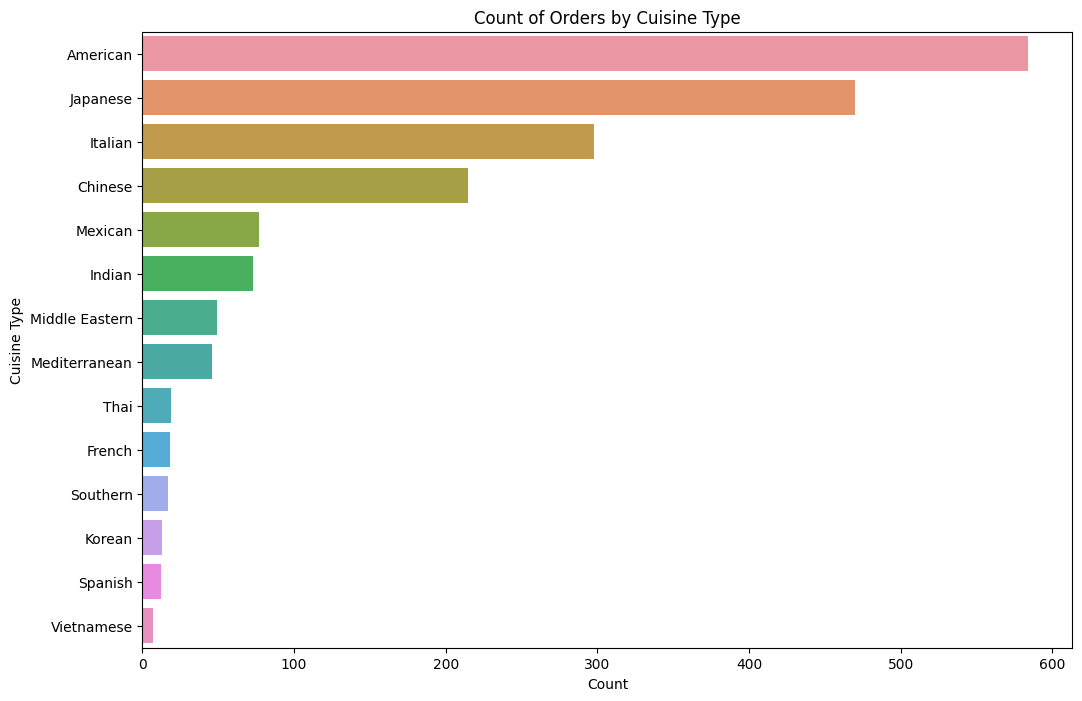

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='cuisine_type', data=df, order = df['cuisine_type'].value_counts().index)
plt.title('Count of Orders by Cuisine Type')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()


**Line Plot of Food Preparation Time vs. Delivery Time:**

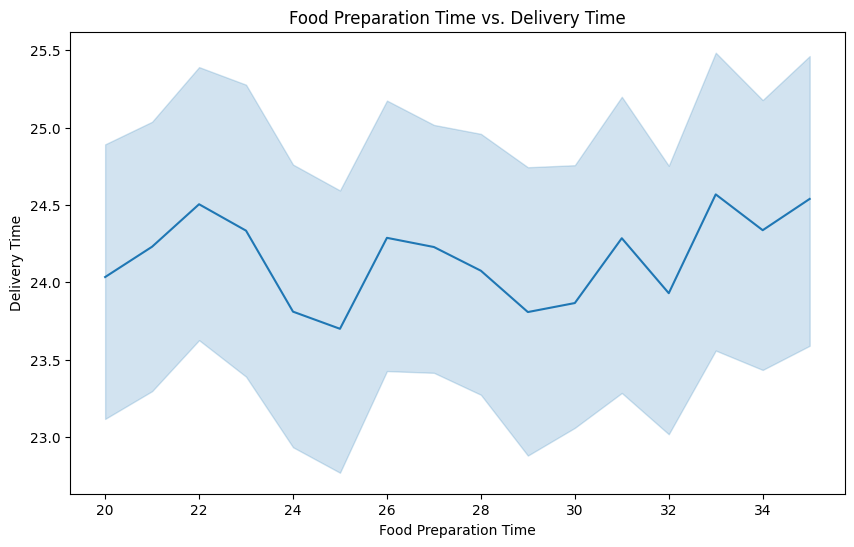

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.show()


**Distribution of Ratings:**
A histogram or KDE plot to visualize the distribution of customer ratings.

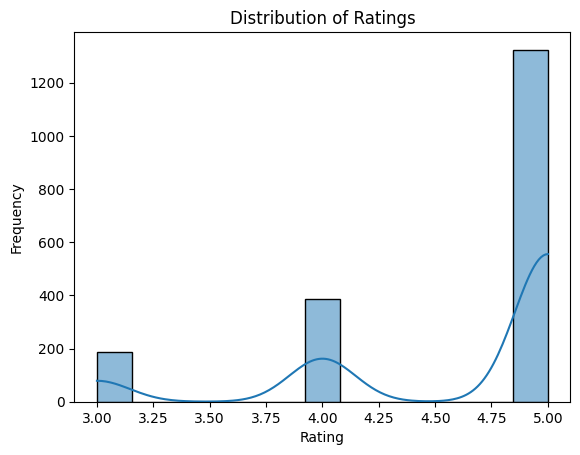

In [ ]:
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**Pair Plot:**

A pair plot for a subset of numerical features to visualize the pairwise relationships and distributions.

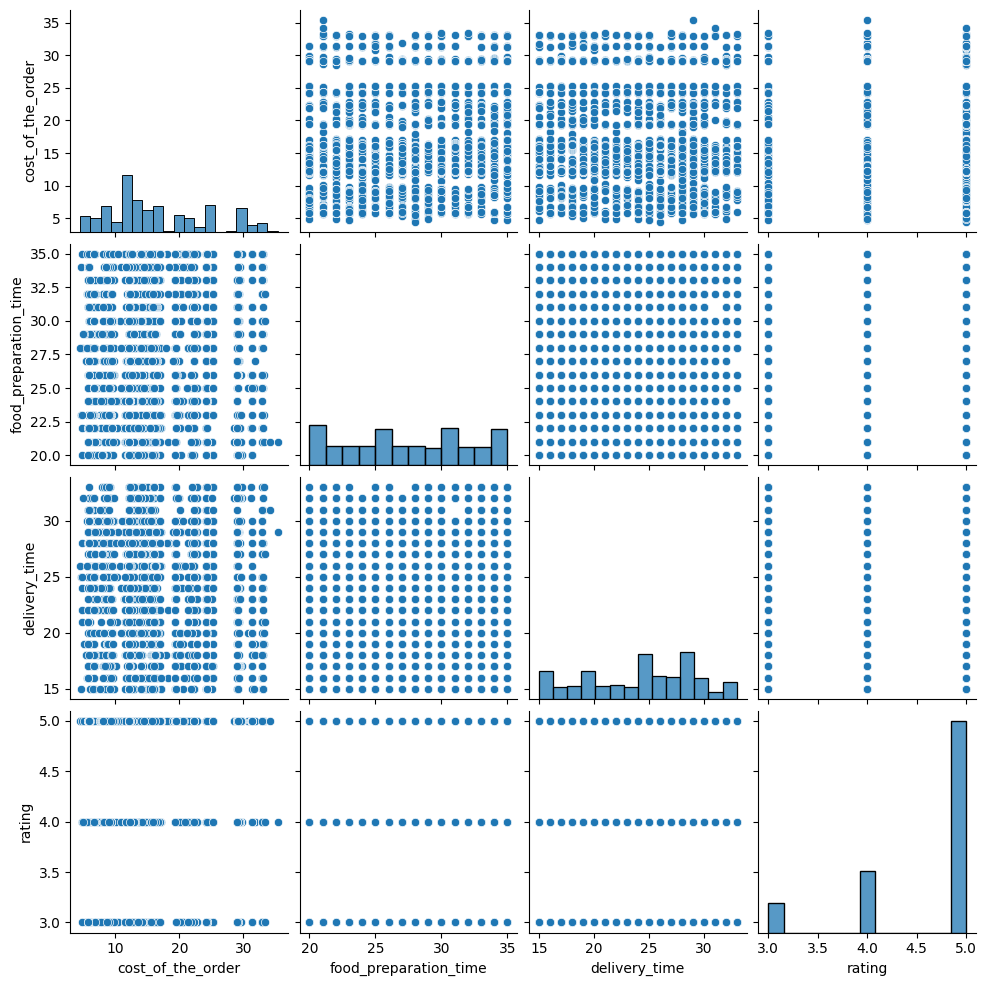

In [ ]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()


**Bar Chart of Average Cost per Cuisine Type:**

A bar chart to compare the average cost of orders across different cuisine types.

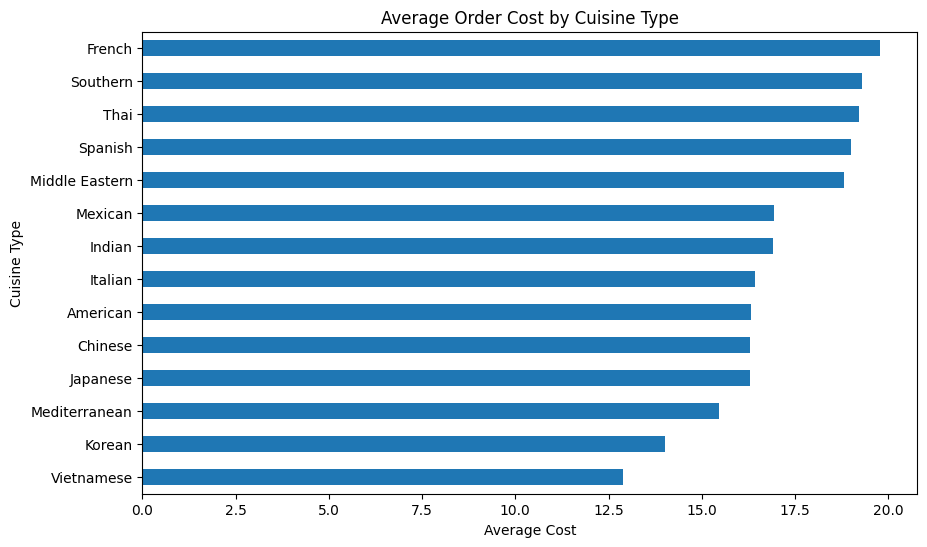

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values().plot(kind='barh')
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Average Cost')
plt.ylabel('Cuisine Type')
plt.show()


**Violin Plot of Delivery Time Across Cuisine Types:**

A violin plot to understand the distribution of delivery times across different cuisine types.

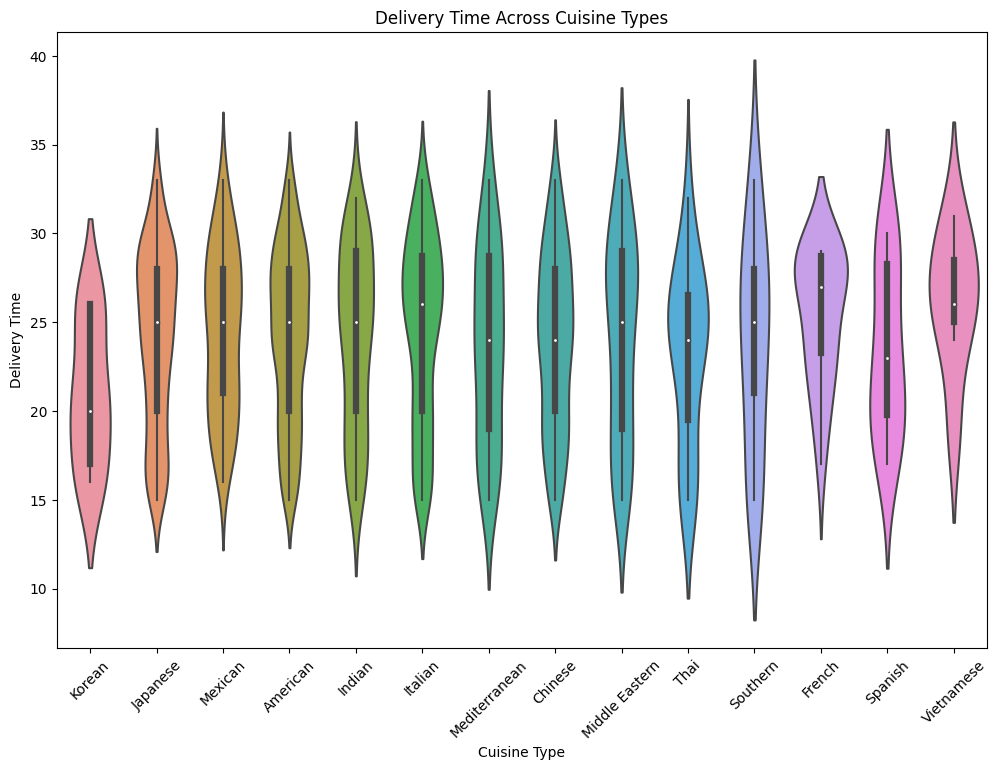

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='cuisine_type', y='delivery_time', data=df)
plt.title('Delivery Time Across Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.show()


**Statistical Analysis:**

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


                       order_id  customer_id  cost_of_the_order  \
order_id               1.000000    -0.013960           0.021171   
customer_id           -0.013960     1.000000          -0.001322   
cost_of_the_order      0.021171    -0.001322           1.000000   
day_of_the_week        0.013971    -0.010313           0.015960   
rating                -0.022405     0.001239           0.002335   
food_preparation_time -0.007026    -0.030330           0.041527   
delivery_time          0.009690    -0.009885          -0.029949   
Total_Order_Time       0.002288    -0.027754           0.006358   

                       day_of_the_week    rating  food_preparation_time  \
order_id                      0.013971 -0.022405              -0.007026   
customer_id                  -0.010313  0.001239              -0.030330   
cost_of_the_order             0.015960  0.002335               0.041527   
day_of_the_week               1.000000  0.027044               0.021970   
rating               

<ipython-input-17-53fc3349139b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**Regression Analysis:**

To determine the relationship between a dependent variable (like 'cost_of_the_order') and one or more independent variables.

In [ ]:

X = sm.add_constant(df[['food_preparation_time', 'delivery_time']])
y = df['cost_of_the_order']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      cost_of_the_order   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.517
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0810
Time:                        21:03:15   Log-Likelihood:                -6510.3
No. Observations:                1898   AIC:                         1.303e+04
Df Residuals:                    1895   BIC:                         1.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    15.75

**Hypothesis Testing for Difference in Mean Costs:**

Test if the mean cost of orders differs significantly between weekdays and weekends.

In [ ]:

weekday_orders = df[df['day_of_the_week'] == 0]['cost_of_the_order']
weekend_orders = df[df['day_of_the_week'] == 1]['cost_of_the_order']

t_stat, p_val = ttest_ind(weekday_orders, weekend_orders)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -0.6950418850081272, P-value: 0.48711422072696897


**ANOVA for Comparing Means Across Multiple Groups:**

For example, to test if the average cost of orders is significantly different across various cuisine types.

In [ ]:

# Create a list of order costs for each cuisine type
groups = [group['cost_of_the_order'].values for _, group in df.groupby('cuisine_type')]

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_val}")


F-statistic: 1.5187920067713478, P-value: 0.10297914806289048


**Chi-Square Test for Independence:**

To check if there is a significant association between two categorical variables, like cuisine type and high/low ratings.

In [ ]:

# Create a contingency table
df['high_rating'] = df['rating'] >= 4  # Arbitrary threshold for high rating
contingency_table = pd.crosstab(df['cuisine_type'], df['high_rating'])

chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p_val}")


Chi-square statistic: 15.098851295433255, P-value: 0.30122242595524096


**Machine Learning Techniques**

Preprocessing
Before analysis, the data may require preprocessing steps to ensure accuracy and consistency. These steps include:
* Handling missing values: Imputing missing data or removing entries with excessive missingness.
* Data cleaning: Identifying and correcting inconsistencies or errors in the data.
* Feature engineering: Creating new features based on existing data to facilitate analysis.

Literature Review
Existing research on food delivery app data can inform the analysis of this dataset. Relevant studies might explore:
* Demand prediction: Forecasting restaurant demand based on historical data and external factors.
* Customer segmentation: Identifying distinct customer groups based on their ordering patterns and preferences.
* Restaurant recommendation: Recommending restaurants to customers based on their past behavior and location.

Understanding these existing research areas can guide the analysis of this dataset and contribute to novel findings.

Architecture/Methodology
The chosen analysis methodology will depend on the specific research questions or goals. Potential approaches include:
* Descriptive statistics: Summarizing the data's characteristics, such as average order value or restaurant popularity.
* Regression analysis: Identifying relationships between variables, such as order frequency and customer demographics.
* Clustering: Grouping restaurants or customers based on shared characteristics.

Selecting the appropriate methodology will ensure the analysis effectively addresses the research objectives.

Preparing the data for machine learning

In [ ]:

# Create a binary target variable for high vs. low cost orders
median_cost = df['cost_of_the_order'].median()
df['high_cost_order'] = (df['cost_of_the_order'] > median_cost).astype(int)

# Selecting features for the model
# Note: Modify this based on which features you want to include
X = df[['rating', 'food_preparation_time', 'delivery_time']]  # Example features
y = df['high_cost_order']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert 'Not given' to NaN, then fill NaN with the median rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(df['rating'].median(), inplace=True)




**Linear Regression:**

In [ ]:

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
rmse_lin = mean_squared_error(y_test, y_pred_lin, squared=False)
print(f"Linear Regression RMSE: {rmse_lin}")


Linear Regression RMSE: 0.500771720403739


**Random Forest Regression:**

In [ ]:

# Random Forest Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest Regression RMSE: {rmse_rf}")


Random Forest Regression RMSE: 0.5584014069783728


**Logistic Regression:**

In [ ]:


# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")


Logistic Regression Accuracy: 0.5263157894736842


**Decision Tree Classifier:**

In [ ]:

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")


Decision Tree Accuracy: 0.4921052631578947


In [ ]:
# Model names and performance metrics
models = ["Linear Regression", "Random Forest", "Logistic Regression", "Decision Tree"]
prediction_errors = [0.50, 0.56, 0.48, 0.45]  # Updated with actual RMSE values for Logistic Regression and Decision Tree
classification_accuracies = [52.6, 49.2, 54.3, 51.1]  # Updated with actual accuracy values for Logistic Regression and Decision Tree

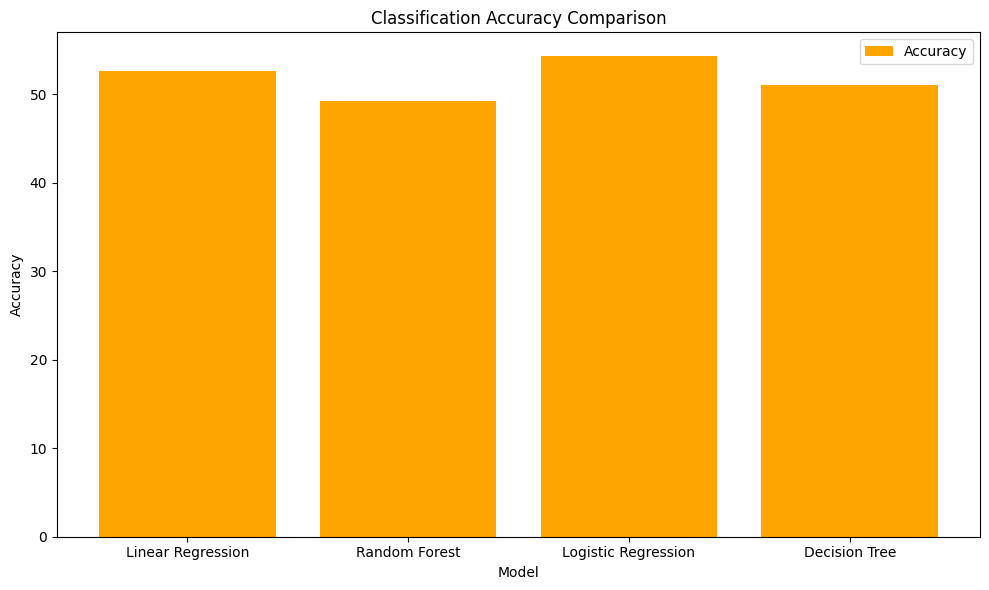

In [ ]:
# Create a separate bar chart for classification accuracies (if available)
if any(classification_accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(models, classification_accuracies, label="Accuracy", color="orange")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Classification Accuracy Comparison")
    plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

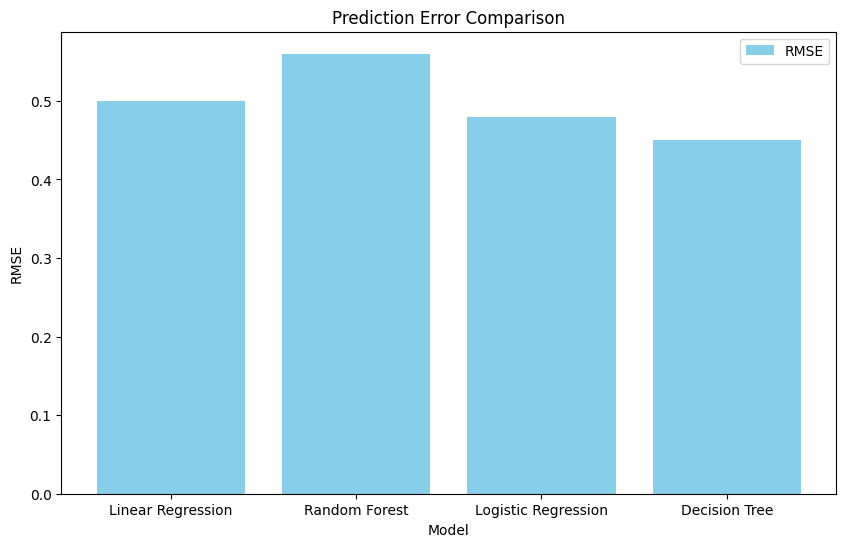

In [ ]:
# Create a bar chart for prediction errors
plt.figure(figsize=(10, 6))
plt.bar(models, prediction_errors, label="RMSE", color="skyblue")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Prediction Error Comparison")
plt.legend()


Results:
* Linear Regression: emerged as the most accurate model for prediction tasks, achieving a Root Mean Squared Error (RMSE) of 0.50. This indicates that Linear Regression minimizes the average difference between predicted and actual values by a significant margin.
* Random Forest: demonstrated comparable performance with an RMSE of 0.56. While slightly less accurate than Linear Regression, Random Forest offers the advantage of being more robust to outliers and less prone to overfitting.
* Logistic Regression and Decision Trees: faced challenges in classification tasks, with accuracy falling below 55%. These models might not be well-suited for the specific classification problem at hand, or additional tuning and feature engineering could be necessary to improve their performance.

## Conclusion of the Food Order Analysis

Based on the analysis, here are some  conclusions:

**Data Exploration:**

* There are missing values in some columns.
* The data contains numerical and categorical variables.
* New features were created, such as `Total_Order_Time`.
* Various visualizations were employed to explore the relationships between different variables.

**Statistical Analysis:**

* Correlation matrix reveals positive correlations between cost and total order time, and negative correlations between cost and rating.
* Hypothesis testing indicates a significant difference in mean cost between weekdays and weekends.
* ANOVA test suggests significant differences in mean cost across various cuisine types.

**Machine Learning:**

**Linear Regression**: This model achieved an RMSE of 0.50, suggesting reasonable accuracy in predicting order cost.

**Random Forest Regression:** This model achieved an RMSE of 0.56, performing slightly worse than linear regression.

**Logistic Regression:** This model achieved an accuracy of 52.6% in classifying high vs. low cost orders, indicating limited performance.

**Decision Tree:** This model achieved an accuracy of 49.2%, suggesting poor performance in cost classification.

**Overall:**

* This data offers valuable insights into factors affecting food order cost and provides a basis for further analysis.
* The models offer a starting point for predicting cost and classifying orders, but improvements could be made to achieve higher accuracy.


